In [3]:
from keras.utils import to_categorical
from keras.preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPooling2D
from keras.callbacks import EarlyStopping  # Import EarlyStopping
from keras.models import save_model
import os
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder


In [83]:
train_dir = 'images/train'
test_dir = 'images/test'

***CREATING DATASET FOR TRAIN from IMAGEs***<br>
Making a function that takes images from the folder and converts it into a dataframe

In [84]:
def create_dataframe(dir):
    images_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            images_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label,"completed")
    return images_paths,labels

In [85]:
#converting into dataframe
train = pd.DataFrame()
#making two cloumns
train['image'], train['label'] = create_dataframe(train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [86]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


***CREATING DATASET FOR TESTING***

In [87]:
#converting into dataframe
test = pd.DataFrame()
#making two cloumns
test['image'], test['label'] = create_dataframe(train_dir)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [88]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, target_size=(48,48))
        img = img.convert('L')  # Convert image to grayscale
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

In [89]:
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [90]:
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [91]:
#NORMALIZE
x_train = train_features/255.0
x_test = train_features/255.0

In [92]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [93]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [94]:
y_train = to_categorical(y_train, num_classes=7) # we have 7 different emotions
y_test = to_categorical(y_test, num_classes=7)

# Creating a CNN Model

In [95]:
model = Sequential()

# convolutional layers
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# output layer
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#early stopping, which will monitor the validation loss and stop training if the validation loss does not decrease for 5 consecutive epochs.

# Train the model
history = model.fit(x=x_train, 
                    y=y_train, 
                    batch_size=256, 
                    epochs=50, 
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


c:\Users\ashok\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 97s 829ms/step - accuracy: 0.2284 - loss: 1.8481 - val_accuracy: 0.2486 - val_loss: 1.8149
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 81s 720ms/step - accuracy: 0.2466 - loss: 1.8182 - val_accuracy: 0.2590 - val_loss: 1.7894
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 88s 781ms/step - accuracy: 0.2586 - loss: 1.7893 - val_accuracy: 0.3140 - val_loss: 1.6940
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 95s 839ms/step - accuracy: 0.3157 - loss: 1.6788 - val_accuracy: 0.3968 - val_loss: 1.5078
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 94s 829ms/step - accuracy: 0.3990 - loss: 1.5246 - val_accuracy: 0.4850 - val_loss: 1.3418
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 93s 821ms/step - accuracy: 0.4536 - loss: 1.4161 - val_accuracy: 0.5113 - val_loss: 1.2721
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 85s 754ms/step - accuracy: 0.4867 - loss: 1.3346 - val_accuracy: 0.5435 - val_loss: 1.1863
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 85s 756ms/step - accuracy: 0.5163 - loss: 1

In [99]:
model_json = model.to_json()
with open("emotiondetector.json", 'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [101]:
model.save("emotiondetector.keras")



In [102]:
save_model(model, "emotiondetector.keras")

***IMPORTING MODEL***


In [1]:
from keras.models import model_from_json

In [5]:
# Load the model architecture from JSON file
json_file = open('emotiondetector.json', 'r')
model_json = json_file.read()
json_file.close()

#load the model
model = model_from_json(model_json)
# Load weights into the model
model.load_weights('emotiondetector.h5')

In [6]:
#emotion labels
label = ['angry','disgust', 'fear', 'happy','neutral', 'sad','surprise']

In [12]:
#extracting features
def ef(image):
    img = load_img(image)
    img = img.convert('L')  # Convert image to grayscale
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
model prediction is angry


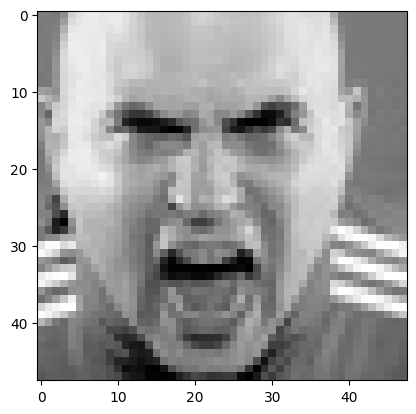

In [19]:
#testing the model and plotting the image
image = 'images/train/angry/22.jpg'
print("original image is of angry")
img = ef(image)
pred = model.predict(img)
pred_label= label[pred.argmax()]
print("model prediction is", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')